use the keras-rl library to implement deep Q-learning 

https://github.com/keras-rl/keras-rl


### Installation

Install Keras-RL from Pypi (recommended):
```
pip install keras-rl
```


Install from Github source:
```
git clone https://github.com/keras-rl/keras-rl.git
cd keras-rl
python setup.py install
````

In [9]:
import numpy as np
import gym

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam

from rl.agents.dqn import DQNAgent
from rl.policy import EpsGreedyQPolicy
from rl.memory import SequentialMemory


In [2]:
ENV_NAME = 'CartPole-v0'

In [3]:
# Get the environment and extract the number of actions.
env = gym.make(ENV_NAME)
np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

In [4]:
input_shape=(1,) + env.observation_space.shape

In [5]:
input_shape

(1, 4)

In [73]:
model = Sequential()
model.add(Flatten(input_shape=(1,) + env.observation_space.shape))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(nb_actions))
model.add(Activation('linear'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_17 (Flatten)         (None, 4)                 0         
_________________________________________________________________
dense_54 (Dense)             (None, 16)                80        
_________________________________________________________________
activation_54 (Activation)   (None, 16)                0         
_________________________________________________________________
dense_55 (Dense)             (None, 16)                272       
_________________________________________________________________
activation_55 (Activation)   (None, 16)                0         
_________________________________________________________________
dense_56 (Dense)             (None, 16)                272       
_________________________________________________________________
activation_56 (Activation)   (None, 16)                0         
__________

In [6]:
model = Sequential()
# model.add(Flatten(input_shape=(1,4)))
model.add(Dense(16, input_shape=(1,4)))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(nb_actions))
model.add(Activation('linear'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1, 16)             80        
_________________________________________________________________
activation_1 (Activation)    (None, 1, 16)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 1, 16)             272       
_________________________________________________________________
activation_2 (Activation)    (None, 1, 16)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 1, 16)             272       
_________________________________________________________________
activation_3 (Activation)    (None, 1, 16)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16)                0         
__________

In [10]:
# Finally, we configure and compile our agent. You can use every built-in Keras optimizer and
# even the metrics!
memory = SequentialMemory(limit=50000, window_length=1)
policy = EpsGreedyQPolicy()
dqn = DQNAgent(model=model, nb_actions=nb_actions, memory=memory, nb_steps_warmup=10,
               target_model_update=1e-2, policy=policy)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])

In [11]:
H = dqn.fit(env, nb_steps=10000, visualize=False, verbose=2)

Training for 10000 steps ...


/Users/hongtao/anaconda3/envs/spinningup/lib/python3.6/site-packages/rl/memory.py:39: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


   12/10000: episode: 1, duration: 3.960s, episode steps: 12, steps per second: 3, episode reward: 12.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.667 [0.000, 1.000], mean observation: -0.114 [-1.751, 0.973], loss: 0.497553, mean_absolute_error: 0.509256, mean_q: -0.016498
   25/10000: episode: 2, duration: 0.149s, episode steps: 13, steps per second: 87, episode reward: 13.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.923 [0.000, 1.000], mean observation: -0.074 [-3.253, 2.194], loss: 0.440938, mean_absolute_error: 0.486571, mean_q: 0.067862


/Users/hongtao/anaconda3/envs/spinningup/lib/python3.6/site-packages/rl/memory.py:39: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')
/Users/hongtao/anaconda3/envs/spinningup/lib/python3.6/site-packages/rl/memory.py:39: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


   34/10000: episode: 3, duration: 0.121s, episode steps: 9, steps per second: 74, episode reward: 9.000, mean reward: 1.000 [1.000, 1.000], mean action: 1.000 [1.000, 1.000], mean observation: -0.127 [-2.809, 1.812], loss: 0.323152, mean_absolute_error: 0.426584, mean_q: 0.237247
   44/10000: episode: 4, duration: 0.118s, episode steps: 10, steps per second: 85, episode reward: 10.000, mean reward: 1.000 [1.000, 1.000], mean action: 1.000 [1.000, 1.000], mean observation: -0.157 [-3.116, 1.934], loss: 0.234744, mean_absolute_error: 0.355153, mean_q: 0.432159
   52/10000: episode: 5, duration: 0.098s, episode steps: 8, steps per second: 82, episode reward: 8.000, mean reward: 1.000 [1.000, 1.000], mean action: 1.000 [1.000, 1.000], mean observation: -0.138 [-2.563, 1.604], loss: 0.185758, mean_absolute_error: 0.309132, mean_q: 0.622192
   61/10000: episode: 6, duration: 0.115s, episode steps: 9, steps per second: 78, episode reward: 9.000, mean reward: 1.000 [1.000, 1.000], mean action

  342/10000: episode: 32, duration: 0.430s, episode steps: 26, steps per second: 61, episode reward: 26.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.231 [0.000, 1.000], mean observation: -0.021 [-2.750, 3.620], loss: 0.096825, mean_absolute_error: 1.366028, mean_q: 2.531889
  352/10000: episode: 33, duration: 0.189s, episode steps: 10, steps per second: 53, episode reward: 10.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.100 [0.000, 1.000], mean observation: 0.148 [-1.544, 2.534], loss: 0.098142, mean_absolute_error: 1.481573, mean_q: 2.840460
  361/10000: episode: 34, duration: 0.170s, episode steps: 9, steps per second: 53, episode reward: 9.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.111 [0.000, 1.000], mean observation: 0.145 [-1.322, 2.257], loss: 0.196824, mean_absolute_error: 1.524436, mean_q: 2.806054
  369/10000: episode: 35, duration: 0.151s, episode steps: 8, steps per second: 53, episode reward: 8.000, mean reward: 1.000 [1.000, 1.000], mean ac

  623/10000: episode: 61, duration: 0.230s, episode steps: 11, steps per second: 48, episode reward: 11.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.182 [0.000, 1.000], mean observation: 0.107 [-1.385, 2.240], loss: 0.252719, mean_absolute_error: 2.443873, mean_q: 4.652440
  636/10000: episode: 62, duration: 0.228s, episode steps: 13, steps per second: 57, episode reward: 13.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.154 [0.000, 1.000], mean observation: 0.097 [-1.756, 2.800], loss: 0.248125, mean_absolute_error: 2.526170, mean_q: 4.827978
  647/10000: episode: 63, duration: 0.242s, episode steps: 11, steps per second: 45, episode reward: 11.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.091 [0.000, 1.000], mean observation: 0.135 [-1.718, 2.705], loss: 0.179364, mean_absolute_error: 2.546573, mean_q: 4.927422
  657/10000: episode: 64, duration: 0.221s, episode steps: 10, steps per second: 45, episode reward: 10.000, mean reward: 1.000 [1.000, 1.000], mean

 2406/10000: episode: 90, duration: 3.271s, episode steps: 142, steps per second: 43, episode reward: 142.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.472 [0.000, 1.000], mean observation: -0.204 [-1.414, 0.402], loss: 0.689873, mean_absolute_error: 8.452146, mean_q: 16.981213
 2546/10000: episode: 91, duration: 3.013s, episode steps: 140, steps per second: 46, episode reward: 140.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.471 [0.000, 1.000], mean observation: -0.237 [-1.413, 0.595], loss: 0.652020, mean_absolute_error: 8.917190, mean_q: 18.000187
 2696/10000: episode: 92, duration: 3.173s, episode steps: 150, steps per second: 47, episode reward: 150.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.473 [0.000, 1.000], mean observation: -0.253 [-1.483, 0.556], loss: 0.632249, mean_absolute_error: 9.474723, mean_q: 19.130997
 2831/10000: episode: 93, duration: 2.989s, episode steps: 135, steps per second: 45, episode reward: 135.000, mean reward: 1.000 [1.000

 7265/10000: episode: 119, duration: 2.619s, episode steps: 141, steps per second: 54, episode reward: 141.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.482 [0.000, 1.000], mean observation: -0.306 [-1.822, 0.412], loss: 1.385589, mean_absolute_error: 23.075144, mean_q: 46.811882
 7409/10000: episode: 120, duration: 2.593s, episode steps: 144, steps per second: 56, episode reward: 144.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.479 [0.000, 1.000], mean observation: -0.275 [-1.600, 0.569], loss: 1.875434, mean_absolute_error: 23.552090, mean_q: 47.844639
 7549/10000: episode: 121, duration: 2.462s, episode steps: 140, steps per second: 57, episode reward: 140.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.486 [0.000, 1.000], mean observation: -0.297 [-1.682, 0.471], loss: 1.869521, mean_absolute_error: 24.073183, mean_q: 48.719387
 7749/10000: episode: 122, duration: 4.474s, episode steps: 200, steps per second: 45, episode reward: 200.000, mean reward: 1.000

In [12]:
dqn.test(env, nb_episodes=5, visualize=True)

Testing for 5 episodes ...
Episode 1: reward: 189.000, steps: 189
Episode 2: reward: 169.000, steps: 169
Episode 3: reward: 170.000, steps: 170
Episode 4: reward: 184.000, steps: 184
Episode 5: reward: 142.000, steps: 142


In [60]:
H.history.keys()

dict_keys(['episode_reward', 'nb_episode_steps', 'nb_steps'])

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

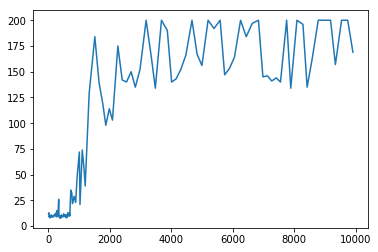

In [14]:
plt.plot(H.history['nb_steps'],H.history['episode_reward'])